Here I look at uninformative descriptions in the sense that they don't contribute information relevant for subject indexing. Any description that repeats itself among various publications is uninformative, asumming there are no duplicates in the repositories. Are there DOIs or something to prevent duplicates?

Currently I cannot check if a description has been removed after pre-processing because the lemmatization might have change some words and definitely the length of the description has changed. Doing so would require identifiers for the descriptions.

In [1]:
import json
from matplotlib import pyplot as plt
from collections import Counter

In [2]:
tu = json.load(open('../../data/json/depositonce/descriptions.json'))
tu_p = json.load(open('../../data/json/depositonce/processed_descriptions.json'))
hu = json.load(open('../../data/json/edoc/descriptions.json'))
hu_p = json.load(open('../../data/json/edoc/processed_descriptions.json'))
fu = json.load(open('../../data/json/refubium/descriptions.json'))
fu_p = json.load(open('../../data/json/refubium/processed_descriptions.json'))
all = dict(tu, **hu, **fu)
all_p = dict(tu_p, **hu_p, **fu_p)

In [3]:
def plot_lengths(data, box_size=1):
    lengths = []
    for id in data:
        for description in data[id]:
            if description is not None:
                lengths.append(len(description))
    lengths, cnt = zip(*sorted(Counter(lengths).items()))
    lengths, cnt = list(lengths), list(cnt)
    y = []
    for i in range(1, len(cnt)+1):
        if lengths[0] == i:
            y.append(cnt.pop(0))
            lengths.pop(0)
        else:
            y.append(0)
    plt.plot(y)
    plt.xlim(-1, 100)
    plt.ylim(0, 400)
    plt.show()
    return y

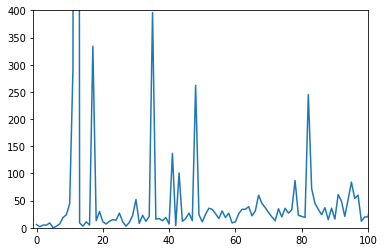

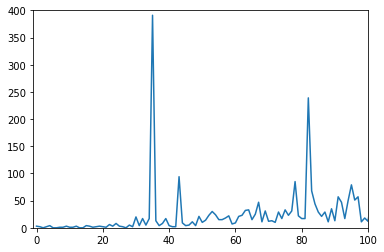

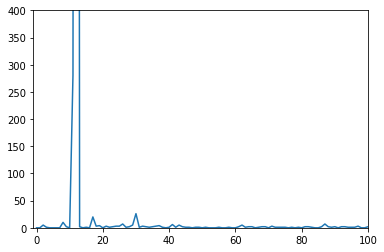

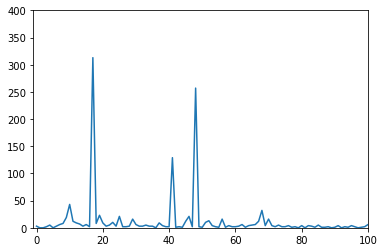

In [4]:
y_all, y_tu, y_hu, y_fu = plot_lengths(all), plot_lengths(tu), plot_lengths(hu), plot_lengths(fu)

In [5]:
print('Here are the peaks of the plot, to check if they are uninformative or not.')
print(f'TU descriptions of length 36 = {y_tu[35]}')
print(f'TU descriptions of length 83 = {y_tu[82]}')
print(f'HU descriptions of length 12 = {y_hu[11]}')
print(f'HU descriptions of length 13 = {y_hu[12]}')
print(f'FU descriptions of length 18 = {y_fu[17]}')
print(f'FU descriptions of length 42 = {y_fu[41]}')
print(f'FU descriptions of length 49 = {y_fu[48]}')

Here are the peaks of the plot, to check if they are uninformative or not.
TU descriptions of length 36 = 391
TU descriptions of length 83 = 239
HU descriptions of length 12 = 281
HU descriptions of length 13 = 5855
FU descriptions of length 18 = 313
FU descriptions of length 42 = 129
FU descriptions of length 49 = 257


In [6]:
def check_data(data, length):
    """ Return the descriptions with the given length. """
    descriptions = []
    for id in data:
        for description in data[id]:
            if description is not None and len(description) == length:
                descriptions.append(description)
    return descriptions

In [7]:
tu_36 = check_data(tu, 36)
open_access = sum(['Open-Access-Mittel' in i for i in tu_36])
rest = [i for i in tu_36 if 'Open-Access-Mittel' not in i]
print(f"Out of the {len(tu_36)} descriptions with 13 characters in depositOnce, {open_access} of them contain 'Open-Access-Mittel'.")
print(f"The rest are: {rest}")

Out of the 391 descriptions with 13 characters in depositOnce, 388 of them contain 'Open-Access-Mittel'.
The rest are: ['12., vollst. überarb. und erw. Aufl.', '2., erweiterte und korrigierte Aufl.', 'DBU - Deutsche Bundesstiftung Umwelt']


In [8]:
tu_83 = check_data(tu, 83)
open_access = sum(['Open Access Publizieren' in i for i in tu_83])
rest = [i for i in tu_83 if 'Open Access Publizieren' not in i]
print(f"Out of the {len(tu_83)} descriptions with 83 characters in depositOnce, {open_access} of them contain 'Open Access Publizieren'.")
print("The rest are:\n" + "\n".join(rest))

Out of the 239 descriptions with 83 characters in depositOnce, 225 of them contain 'Open Access Publizieren'.
The rest are:
DFG, GRK 1845, Stochastic Analysis and Applications in Biology, Finance and Physics
Printausgabe erschienen im Universitätsverlag der TU Berlin unter 978-3-7983-2740-5
DFG, 286237555, TRR 195: Symbolische Werkzeuge in der Mathematik und ihre Anwendung
DFG, GRK 1845, Stochastic Analysis and Applications in Biology, Finance and Physics
EC/H2020/715452/EU/Understanding the speed limits of magnetism/MAGNETIC-SPEED-LIMIT
EU, ICARE4EU, Innovating care for people with multiple chronic conditions in Europe
DFG, SPP 1726, Mikroschwimmer - Von Einzelpartikelbewegung zu kollektivem Verhalten
BMBF, 03XP0115C, LISZUBA - Lithium-Schwefel-Feststoffbatterien als Zukunftsbatterie
EC/FP7/308481/EU/Economic Instruments to Achieve Climate Targets in Europe/ENTRACTE
DFG, 390837967, EXC 2123: QuantumFrontiers - Licht und Materie an der Quantengrenze
DFG, SPP 1726, Mikroschwimmer - Von 

In [9]:
hu_12 = check_data(hu, 12)
not_reviewed = sum([i == 'Not Reviewed' for i in hu_12])
print(f"Out of the {len(hu_12)} descriptions with 12 characters in edoc, {not_reviewed} of them contain 'Not Reviewed'.")
rest = [i for i in hu_12 if 'Not Reviewed' not in i]
print(f"The rest are: {rest}")

Out of the 281 descriptions with 12 characters in edoc, 278 of them contain 'Not Reviewed'.
The rest are: ['Horizon 2020', 'Horizon 2020', 'Horizon 2020']


In [10]:
hu_13 = check_data(hu, 13)
peer_reviewed = sum([i == 'Peer Reviewed' for i in hu_13])
print(f"Out of the {len(hu_13)} descriptions with 13 characters in edoc, {peer_reviewed} of them contain 'Peer Reviewed'.")

Out of the 5855 descriptions with 13 characters in edoc, 5855 of them contain 'Peer Reviewed'.


In [11]:
fu_18 = check_data(fu, 18)
gesamtdissertation = sum([i == 'Gesamtdissertation' for i in fu_18])
rest = [i for i in fu_18 if 'Gesamtdissertation' not in i]
print(f"Out of the {len(fu_18)} descriptions with 18 characters in refubium, {gesamtdissertation} of them contain 'Gesamtdissertation'.")
print(f"The rest are: {rest}")

Out of the 313 descriptions with 18 characters in refubium, 309 of them contain 'Gesamtdissertation'.
The rest are: ['Stand 2. Juni 2016', '4., überarb. Aufl.', '14\\. November 2012', 'see in german only']


In [12]:
fu_42 = check_data(fu, 42)
electronic = sum(['Elektronische Version der gedr. Ausg.' in i for i in fu_42])
rest = [i for i in fu_42 if 'Elektronische Version der gedr. Ausg.' not in i]
print(f"Out of the {len(fu_42)} descriptions with 42 characters in refubium, {electronic} of them contain 'Elektronische Version der gedr. Ausg.'.")
print(f"The rest are: {rest}")

Out of the 129 descriptions with 42 characters in refubium, 127 of them contain 'Elektronische Version der gedr. Ausg.'.
The rest are: ['Die komplette Dissertation im :  \ndiss.pdf', 'Deckblatt  \nGesamtdissertation  \nErklärung']


In [16]:
fu_49 = check_data(fu, 49)
digitalisat = sum(['Digitalisat der Ausgabe' in i for i in fu_49])
rest = [i for i in fu_49 if 'Digitalisat der Ausgabe' not in i]
print(f"Out of the {len(fu_49)} descriptions with 49 characters in edoc, {digitalisat} of them contain 'Digitalisat der Ausgabe'.")
print(f"The rest are: {rest}")

Out of the 257 descriptions with 49 characters in edoc, 254 of them contain 'Digitalisat der Ausgabe'.
The rest are: ['4. überarbeitete und erheblich erweiterte Auflage', 'Statistik; Freie Universität Berlin; Bibliotheken', 'Elektronische Version der gedr. Ausg. Moskva 2002']
